In [18]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, datasets
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import Subset

In [17]:
# Check if GPU is available
if torch.cuda.is_available():
    # Set the device to GPU
    device = torch.device("cuda")
    print("GPU is available.")
else:
    # Set the device to CPU
    device = torch.device("cpu")
    print("GPU is not available. Using CPU instead.")

GPU is not available. Using CPU instead.


In [19]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
os.chdir("/content/drive/MyDrive/ASG3")
os.listdir()

['Animals.zip',
 '.ipynb_checkpoints',
 'raw-img',
 'translate.py',
 'model4.pth',
 'Animal_Classification (4).ipynb']

In [ ]:
"""with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall(".")"""

In [5]:
print("Length of Files")
for i in os.listdir("raw-img"):
    print(i, ":", len(os.listdir("raw-img/" + i)))

Length of Files
cane : 4863
cavallo : 2623
elefante : 1446
farfalla : 2112
gallina : 3098
gatto : 1668
mucca : 1866
pecora : 1820
ragno : 4821
scoiattolo : 1862


In [21]:
data_dir = "raw-img"

In [22]:
# You can add more transformations as needed
data_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),  # Resize images to 64x64
        transforms.ToTensor(),  # Convert images to tensors
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),  # Normalize images
    ]
)

# Load the dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)

# Define the sizes of training, validation, and testing subsets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

# Split the dataset into training, validation, and testing subsets
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size]
)
train_subset = Subset(train_dataset, range(500))
val_subset = Subset(val_dataset, range(100))
test_subset = Subset(test_dataset, range(100))

# Define the dataloaders for training, validation, and testing batch size = 32
train_dataloader = torch.utils.data.DataLoader(
    train_subset, batch_size=32, shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(val_subset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_subset, batch_size=32, shuffle=True)

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.seq1 = nn.Sequential(
            nn.Conv2d(3, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(3, 3),
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.Conv2d(128, 256, 1),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(),
            nn.Conv2d(256, 64, 1),
            nn.ReLU(),
        )

        self.maxpool = nn.MaxPool2d(2, 2)
        self.flat = nn.Flatten(1)
        self.layer = nn.Linear(576, num_classes)

    def forward(self, x):
        # input = [batch_size, 3, 224, 224]
        x = self.seq1(x)
        x = self.maxpool(x)
        x = self.flat(x)
        x = self.flat(x)
        x = self.layer(x)
        # output = [batch_size, num_classes]
        return x

In [ ]:
class CNN_Dropout(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.seq1 = nn.Sequential(
            nn.Conv2d(3, 64, 3),
            nn.ReLU(),
            nn.Dropout(0.25),  # Add dropout after ReLU
            nn.MaxPool2d(3, 3),
            nn.Conv2d(64, 128, 3),
            nn.ReLU(),
            nn.Dropout(0.25),  # Add dropout after ReLU
            nn.Conv2d(128, 256, 1),
            nn.ReLU(),
            nn.Dropout(0.25),  # Add dropout after ReLU
            nn.Conv2d(256, 256, 3),
            nn.ReLU(),
            nn.Dropout(0.25),  # Add dropout after ReLU
            nn.Conv2d(256, 64, 1),
            nn.ReLU(),
            nn.Dropout(0.25),  # Add dropout after ReLU
        )

        self.maxpool = nn.MaxPool2d(2, 2)
        self.flat = nn.Flatten(1)
        self.layer = nn.Linear(576, num_classes)

    def forward(self, x):
        # input = [batch_size, 3, 224, 224]
        x = self.seq1(x)
        x = self.maxpool(x)
        x = self.flat(x)
        x = self.flat(x)
        x = self.layer(x)
        # output = [batch_size, num_classes]
        return x

In [ ]:
# Create Model 1 with learning rate = 0.001 and batch size = 128
model1 = CNN()

print(model1)

CNN(
  (seq1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
    (6): ReLU()
    (7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
    (10): ReLU()
  )
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flat): Flatten(start_dim=1, end_dim=-1)
  (layer): Linear(in_features=576, out_features=10, bias=True)
)


In [14]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    corrects = torch.sum(preds == labels.data)
    return corrects.double() / len(labels)


def train_model(
    model, train_dataloader, optimizer, criterion, model_name, num_epochs=100
):
    num_epochs = 100
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_dataloader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

        epoch_loss = running_loss / len(train_dataloader.dataset)
        epoch_acc = running_corrects.double() / len(train_dataloader.dataset)
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)

        model.eval()
        val_loss = 0.0
        val_corrects = 0

        with torch.no_grad():
            for inputs, labels in val_dataloader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(torch.argmax(outputs, 1) == labels.data)

        val_loss = val_loss / len(val_dataloader.dataset)
        val_acc = val_corrects.double() / len(val_dataloader.dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(
            f"Epoch [{epoch+1}/{num_epochs}], "
            f"Training Loss: {epoch_loss:.4f}, Training Acc: {epoch_acc:.4f}, "
            f"Validation Loss: {val_loss:.4f}, Validation Acc: {val_acc:.4f}"
        )

    torch.save(model.state_dict(), model_name)

    plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
    plt.plot(range(1, num_epochs + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Losses")
    plt.legend()
    plt.show()

    plt.plot(range(1, num_epochs + 1), train_accs, label="Training Accuracy")
    plt.plot(range(1, num_epochs + 1), val_accs, label="Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

In [28]:
def evaluate_model(model, test_data):
    # Set the model to evaluation mode
    model.eval()

    # Initialize lists to store true labels and predicted labels
    true_labels = []
    pred_labels = []

    # Iterate through the test dataset and make predictions
    with torch.no_grad():
        for images, labels in test_data:
            # Forward pass
            outputs = model(images)

            # Get predicted labels
            _, predicted = torch.max(outputs, 1)

            # Append true and predicted labels to the lists
            true_labels.extend(labels.cpu().numpy())
            pred_labels.extend(predicted.cpu().numpy())

    # Compute evaluation metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average="weighted")
    recall = recall_score(true_labels, pred_labels, average="weighted")
    f1 = f1_score(true_labels, pred_labels, average="weighted")

    # Print the computed metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    # Compute and visualize confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        cmap="Blues",
        fmt="g",
        xticklabels=range(10),
        yticklabels=range(10),
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

In [ ]:
# Create Model 1 with learning rate = 0.001 and batch size = 32
# Define the cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Define the SGD optimizer with learning rate and momentum
optimizer1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

# Create Model 2 with learning rate = 0.1 and batch size = 32
model2 = CNN()

# Define the SGD optimizer with learning rate and momentum
optimizer2 = optim.SGD(model2.parameters(), lr=0.1, momentum=0.9)

# Create Model 3 with learning rate = 0.001 and batch size = 128
model3 = CNN()

# Define the Adam optimizer with learning rate = 0.001
optimizer3 = optim.Adam(model3.parameters(), lr=0.001)

Epoch :  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [1/100], Training Loss: 2.3052, Validation Loss: 0.0000
Epoch [1/100], Training Loss: 2.3052, Validation Loss: 2.3051
Epoch :  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [2/100], Training Loss: 2.2979, Validation Loss: 0.0000
Epoch [2/100], Training Loss: 2.2979, Validation Loss: 2.2991
Epoch :  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [3/100], Training Loss: 2.2891, Validation Loss: 0.0000
Epoch [3/100], Training Loss: 2.2891, Validation Loss: 2.2933
Epoch :  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [4/100], Training Loss: 2.2801, Validation Loss: 0.0000
Epoch [4/100], Training Loss: 2.2801, Validation Loss: 2.2871
Epoch :  4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [5/100], Training Loss: 2.2707, Validation Loss: 0.0000
Epoch [5/100], Training Loss: 2.2707, Validation Loss: 2.2808
Epoch :  5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [6/100], Training Loss: 2.2605, Validation Loss: 0.0000
Epoch [6/100], Training 

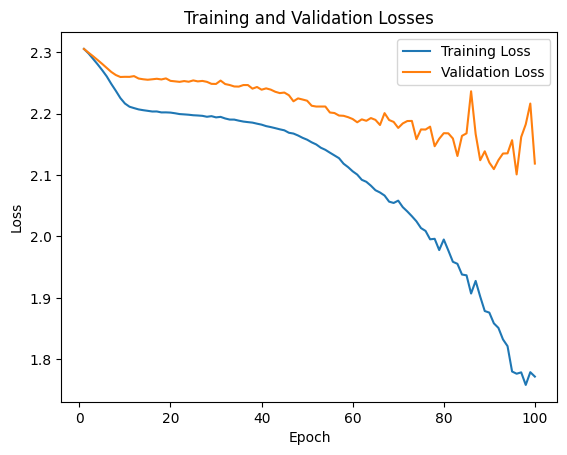

In [ ]:
train_model(model1, train_dataloader, optimizer1, criterion, "model1.pth")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.22
Precision: 0.18809122807017545
Recall: 0.22
F1-score: 0.1727354859296783


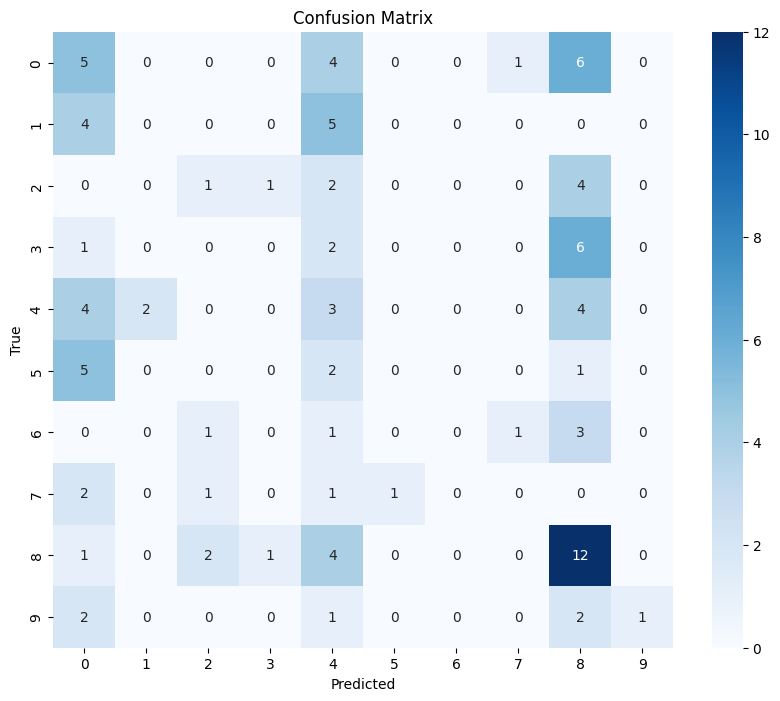

In [ ]:
evaluate_model(model1, test_dataloader)

Epoch :  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [1/100], Training Loss: 2.2577, Validation Loss: 0.0000
Epoch [1/100], Training Loss: 2.2577, Validation Loss: 2.2715
Epoch :  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [2/100], Training Loss: 2.2185, Validation Loss: 0.0000
Epoch [2/100], Training Loss: 2.2185, Validation Loss: 2.2520
Epoch :  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [3/100], Training Loss: 2.2264, Validation Loss: 0.0000
Epoch [3/100], Training Loss: 2.2264, Validation Loss: 2.2468
Epoch :  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [4/100], Training Loss: 2.2092, Validation Loss: 0.0000
Epoch [4/100], Training Loss: 2.2092, Validation Loss: 2.2611
Epoch :  4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [5/100], Training Loss: 2.1916, Validation Loss: 0.0000
Epoch [5/100], Training Loss: 2.1916, Validation Loss: 2.2092
Epoch :  5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [6/100], Training Loss: 2.1628, Validation Loss: 0.0000
Epoch [6/100], Training 

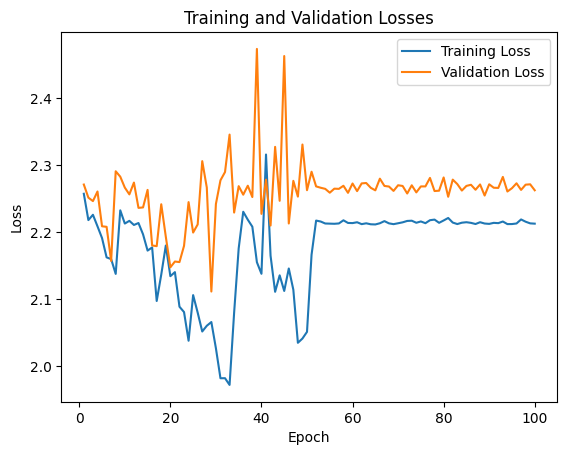

In [ ]:
train_model(model2, train_dataloader, optimizer2, criterion, "model2.pth")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.16
Precision: 0.0256
Recall: 0.16
F1-score: 0.04413793103448277


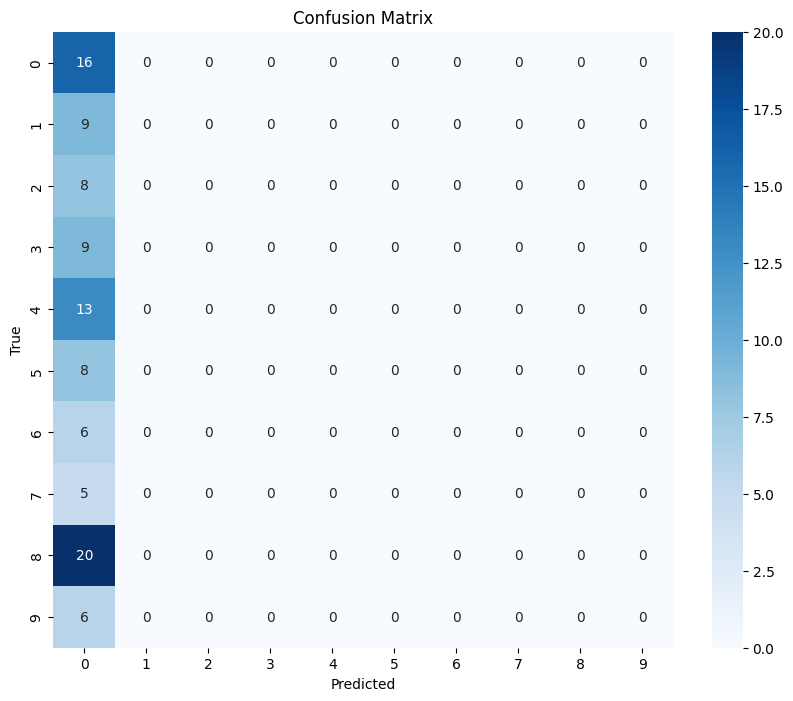

In [ ]:
evaluate_model(model2, test_dataloader)

Epoch :  0
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [1/100], Training Loss: 2.7340, Validation Loss: 0.0000
Epoch [1/100], Training Loss: 2.7340, Validation Loss: 2.2692
Epoch :  1
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [2/100], Training Loss: 2.2599, Validation Loss: 0.0000
Epoch [2/100], Training Loss: 2.2599, Validation Loss: 2.3256
Epoch :  2
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [3/100], Training Loss: 2.2500, Validation Loss: 0.0000
Epoch [3/100], Training Loss: 2.2500, Validation Loss: 2.2475
Epoch :  3
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [4/100], Training Loss: 2.2257, Validation Loss: 0.0000
Epoch [4/100], Training Loss: 2.2257, Validation Loss: 2.2568
Epoch :  4
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [5/100], Training Loss: 2.2156, Validation Loss: 0.0000
Epoch [5/100], Training Loss: 2.2156, Validation Loss: 2.2519
Epoch :  5
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 Epoch [6/100], Training Loss: 2.2169, Validation Loss: 0.0000
Epoch [6/100], Training 

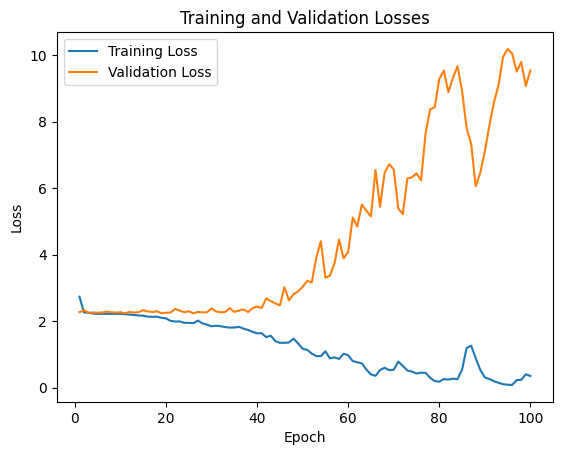

In [ ]:
train_model(model3, train_dataloader, optimizer3, criterion, "model3.pth")

Accuracy: 0.21
Precision: 0.19960559486952675
Recall: 0.21
F1-score: 0.20359256429844666


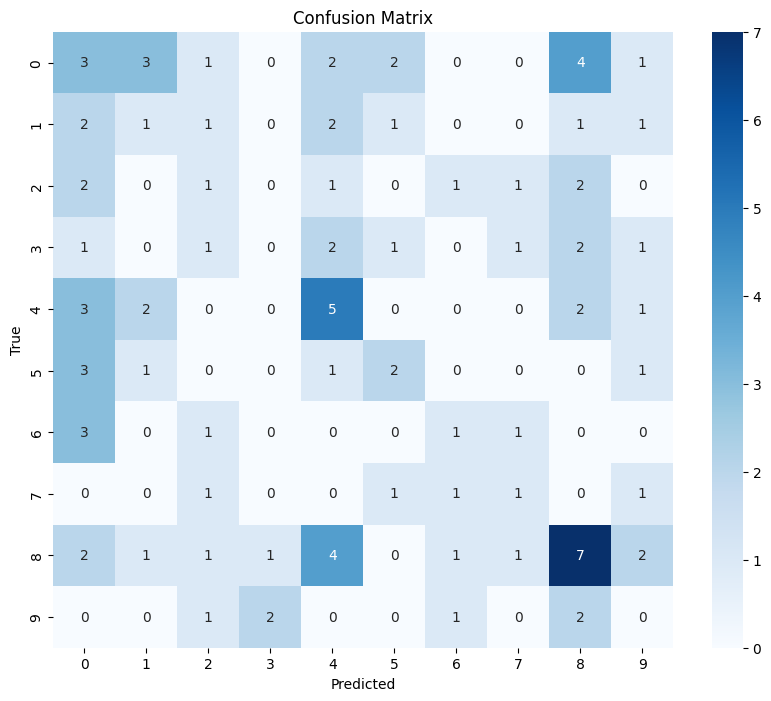

In [ ]:
evaluate_model(model3, test_dataloader)

In [ ]:
model1 = CNN_Dropout()
# Define the cross-entropy loss function
criterion = nn.CrossEntropyLoss()

# Define the SGD optimizer with learning rate and momentum
optimizer1 = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

Epoch [1/100], Training Loss: 2.3031, Training Acc: 0.1180, Validation Loss: 2.3013, Validation Acc: 0.1500
Epoch [2/100], Training Loss: 2.2872, Training Acc: 0.1860, Validation Loss: 2.2960, Validation Acc: 0.1500
Epoch [3/100], Training Loss: 2.2707, Training Acc: 0.1780, Validation Loss: 2.2903, Validation Acc: 0.1500
Epoch [4/100], Training Loss: 2.2506, Training Acc: 0.1820, Validation Loss: 2.2844, Validation Acc: 0.1500
Epoch [5/100], Training Loss: 2.2326, Training Acc: 0.1820, Validation Loss: 2.2771, Validation Acc: 0.1500
Epoch [6/100], Training Loss: 2.2139, Training Acc: 0.1820, Validation Loss: 2.2717, Validation Acc: 0.1500
Epoch [7/100], Training Loss: 2.2075, Training Acc: 0.1820, Validation Loss: 2.2683, Validation Acc: 0.1500
Epoch [8/100], Training Loss: 2.1995, Training Acc: 0.1820, Validation Loss: 2.2666, Validation Acc: 0.1500
Epoch [9/100], Training Loss: 2.1966, Training Acc: 0.1820, Validation Loss: 2.2643, Validation Acc: 0.1500
Epoch [10/100], Training Los

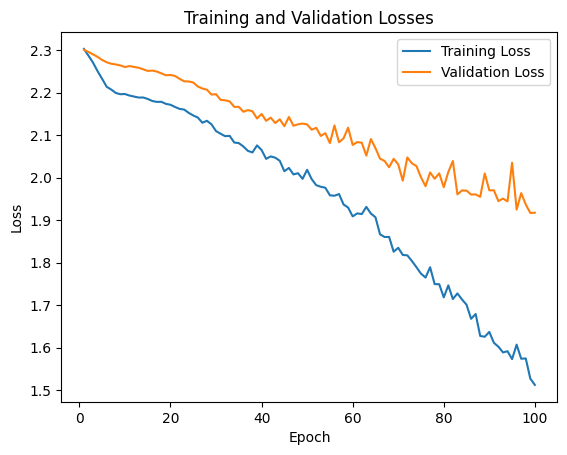

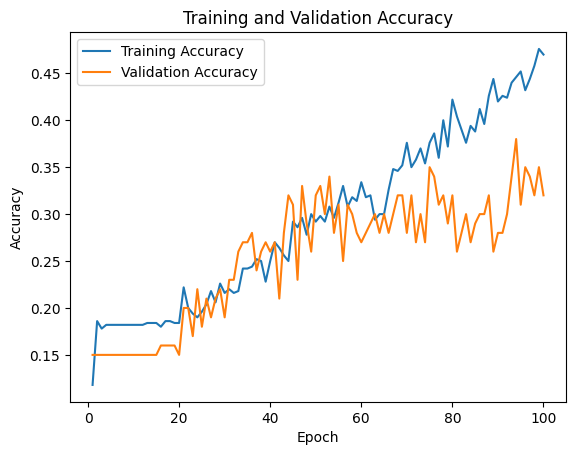

In [ ]:
train_model(model1, train_dataloader, optimizer1, criterion, "model4.pth")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.27
Precision: 0.29279220779220777
Recall: 0.27
F1-score: 0.23540223665223664


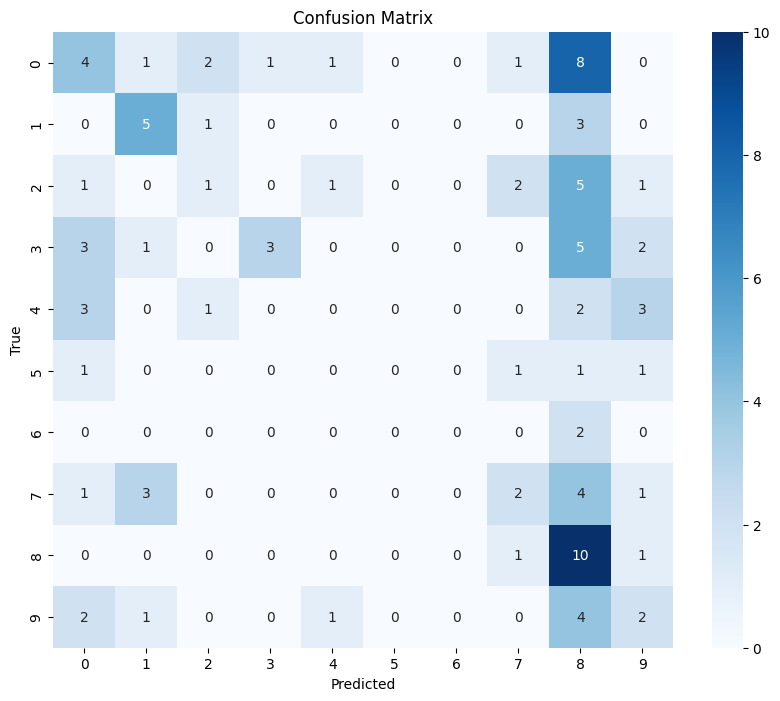

In [ ]:
evaluate_model(model1, test_dataloader)

# Efficient Net

Epoch 1/100, Loss: 0.0608, Validation Accuracy: 0.1500
Epoch 2/100, Loss: 0.0570, Validation Accuracy: 0.1400
Epoch 3/100, Loss: 0.0566, Validation Accuracy: 0.1800
Epoch 4/100, Loss: 0.0552, Validation Accuracy: 0.1300
Epoch 5/100, Loss: 0.0551, Validation Accuracy: 0.2100
Epoch 6/100, Loss: 0.0536, Validation Accuracy: 0.1900
Epoch 7/100, Loss: 0.0534, Validation Accuracy: 0.2500
Epoch 8/100, Loss: 0.0525, Validation Accuracy: 0.2500
Epoch 9/100, Loss: 0.0521, Validation Accuracy: 0.1800
Epoch 10/100, Loss: 0.0507, Validation Accuracy: 0.2400
Epoch 11/100, Loss: 0.0513, Validation Accuracy: 0.2000
Epoch 12/100, Loss: 0.0505, Validation Accuracy: 0.2700
Epoch 13/100, Loss: 0.0516, Validation Accuracy: 0.2300
Epoch 14/100, Loss: 0.0496, Validation Accuracy: 0.2000
Epoch 15/100, Loss: 0.0489, Validation Accuracy: 0.2500
Epoch 16/100, Loss: 0.0485, Validation Accuracy: 0.2300
Epoch 17/100, Loss: 0.0489, Validation Accuracy: 0.2800
Epoch 18/100, Loss: 0.0475, Validation Accuracy: 0.2400
E

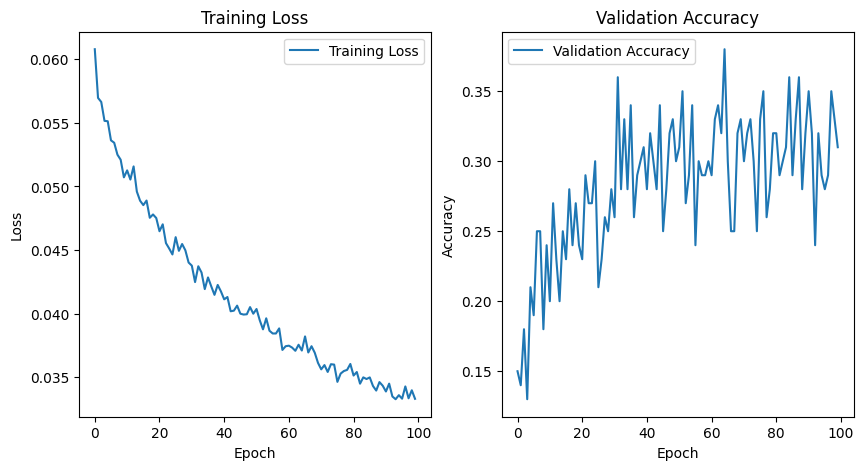

In [23]:
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

# Define transforms
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Step 1: Load the pretrained model
pretrained_model = models.resnet18(pretrained=True)

# Step 2: Freeze the parameters of the pretrained layers
for param in pretrained_model.parameters():
    param.requires_grad = False

# Step 3: Modify the final fully connected layer
num_classes = 10
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Step 4: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(pretrained_model.fc.parameters(), lr=0.001)


# Function to calculate accuracy
def calculate_accuracy(loader):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = pretrained_model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return correct / total


# Training loop
num_epochs = 100
train_losses = []
val_accuracies = []
for epoch in range(num_epochs):
    pretrained_model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    # Calculate average loss per epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # Calculate validation accuracy
    val_accuracy = calculate_accuracy(test_dataloader)
    val_accuracies.append(val_accuracy)

    print(
        f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}"
    )

# Calculate test accuracy
test_accuracy = calculate_accuracy(test_dataloader)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.31
Precision: 0.28560331825037705
Recall: 0.31
F1-score: 0.2837423510466989


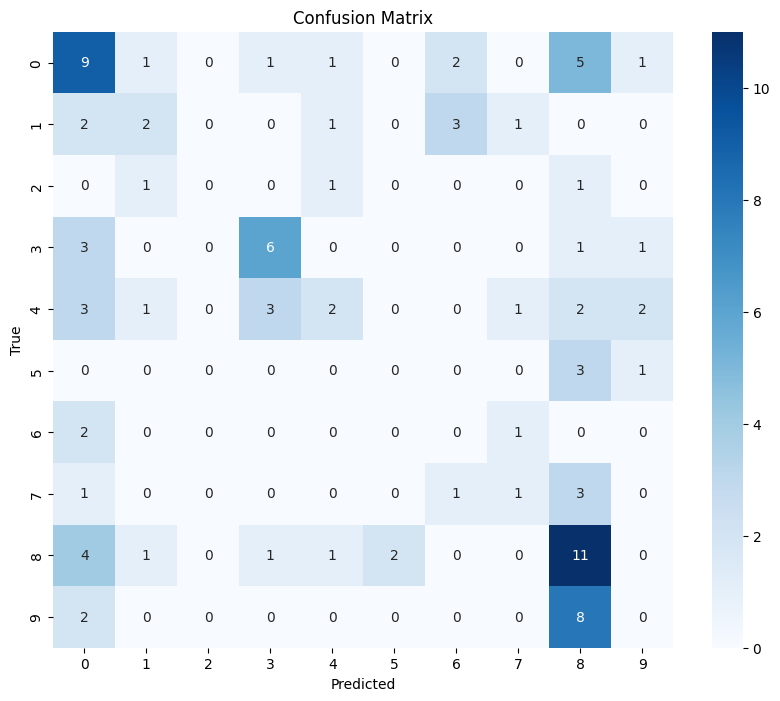

In [29]:
evaluate_model(pretrained_model, test_dataloader)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/100, Loss: 0.0605, Validation Accuracy: 0.1900
Epoch 2/100, Loss: 0.0519, Validation Accuracy: 0.2600
Epoch 3/100, Loss: 0.0473, Validation Accuracy: 0.2600
Epoch 4/100, Loss: 0.0448, Validation Accuracy: 0.3100
Epoch 5/100, Loss: 0.0420, Validation Accuracy: 0.2700
Epoch 6/100, Loss: 0.0390, Validation Accuracy: 0.3000
Epoch 7/100, Loss: 0.0375, Validation Accuracy: 0.3200
Epoch 8/100, Loss: 0.0362, Validation Accuracy: 0.3200
Epoch 9/100, Loss: 0.0345, Validation Accuracy: 0.3400
Epoch 10/100, Loss: 0.0335, Validation Accuracy: 0.3000
Epoch 11/100, Loss: 0.0321, Validation Accuracy: 0.3100
Epoch 12/100, Loss: 0.0302, Validation Accuracy: 0.3100
Epoch 13/100, Loss: 0.0295, Validation Accuracy: 0.3000
Epoch 14/100, Loss: 0.0275, Validation Accuracy: 0.2900
Epoch 15/100, Loss: 0.0278, Validation Accuracy: 0.3100
Epoch 16/100, Loss: 0.0265, Validation Accuracy: 0.3800
Epoch 17/100, Loss: 0.0255, Validation Accuracy: 0.3500
Epoch 18/100, Loss: 0.0249, Validation Accuracy: 0.3900
E

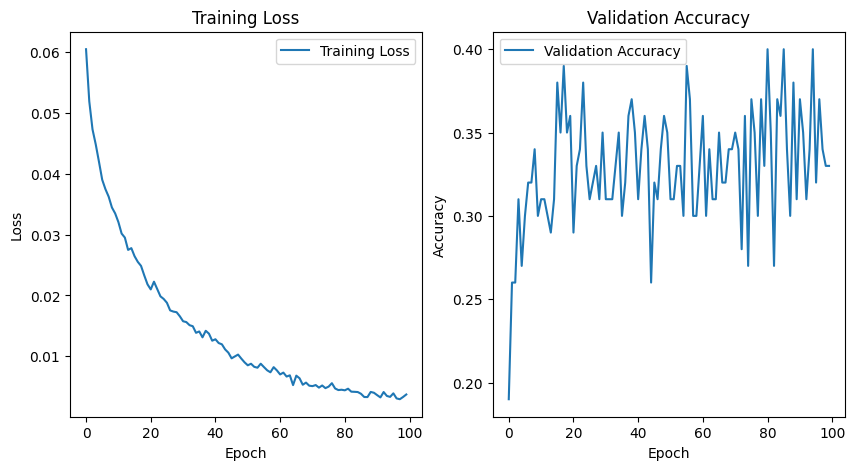

In [30]:
# Step 1: Load the pretrained model
pretrained_model = models.resnet18(pretrained=True)

# Step 2: Freeze the parameters of most layers
for name, param in pretrained_model.named_parameters():
    if (
        "layer4" not in name and "fc" not in name
    ):  # Unfreeze last two conv layers and FC layer
        param.requires_grad = False

# Step 3: Modify the final fully connected layer
num_classes = 10  # Example: if you're working with CIFAR-10
pretrained_model.fc = nn.Linear(pretrained_model.fc.in_features, num_classes)

# Step 4: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(
    filter(lambda p: p.requires_grad, pretrained_model.parameters()), lr=0.001
)


# Training loop
num_epochs = 100
train_losses = []
val_accuracies = []
for epoch in range(num_epochs):
    pretrained_model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = pretrained_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    # Calculate average loss per epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    # Calculate validation accuracy
    val_accuracy = calculate_accuracy(test_dataloader)
    val_accuracies.append(val_accuracy)

    print(
        f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}"
    )

# Calculate test accuracy
test_accuracy = calculate_accuracy(test_dataloader)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()

plt.show()

Accuracy: 0.29
Precision: 0.2825223665223665
Recall: 0.29
F1-score: 0.2827019250253293


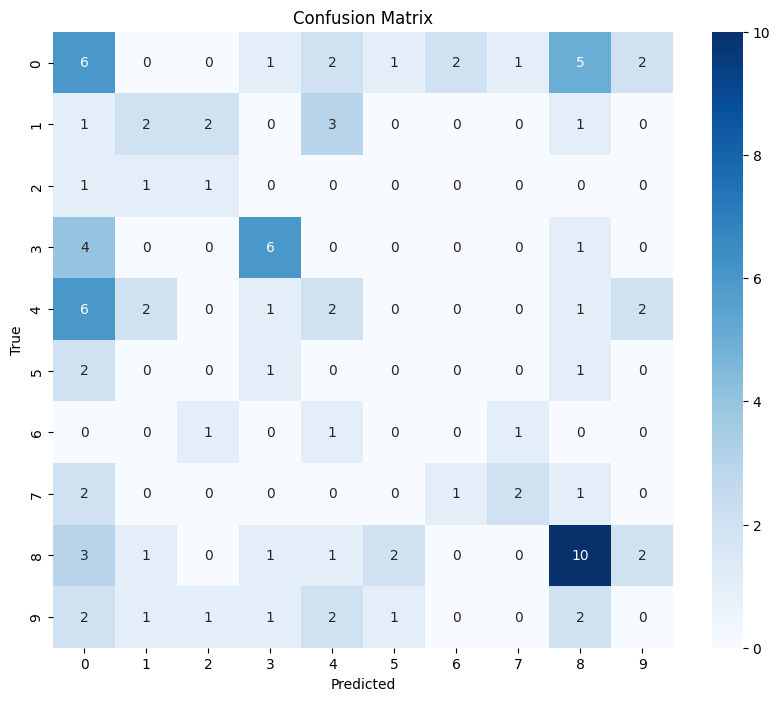

In [31]:
evaluate_model(pretrained_model, test_dataloader)